In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns


In [ ]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x =df.iloc[:, : -1]
y =df.iloc[:, -1]

In [6]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [7]:
## Get the Fraud and the normal dataset 

diabetes = df[df['Outcome']==1]

no = df[df['Outcome']==0]

C:\Users\SREE RAMULU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


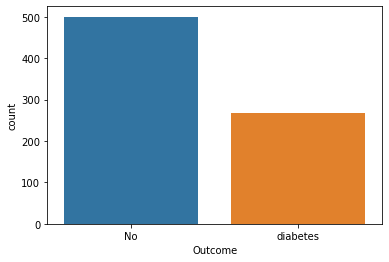

In [56]:
# plot the no of 1's and 0's
g = sns.countplot(df['Outcome'])
g.set_xticklabels(['No', 'diabetes'])
plt.show()

In [8]:
print(diabetes.shape,no.shape)

(268, 9) (500, 9)


In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [11]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(x,y)
X_res.shape,y_res.shape

((536, 8), (536,))

In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 268, 1: 268})


In [13]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(x,y)
X_res.shape,y_res.shape

((952, 8), (952,))

In [14]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 476, 0: 476})


In [15]:
def plot_2d_space(x, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            x[y==l, 0],
            x[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# Random under-sampling and over-sampling with imbalanced-learn

In [16]:
from imblearn.under_sampling import RandomUnderSampler



In [17]:

rus = RandomUnderSampler()


In [18]:

X_rus, y_rus = rus.fit_resample(x, y)

In [19]:
X_rus.shape, y_rus.shape

((536, 8), (536,))

In [21]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_rus)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 268, 1: 268})


In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ro0s = ros.fit_resample(x, y)

print(X_ros.shape[0] - x.shape[0], 'new random picked points')



232 new random picked points


In [23]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ro0s)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


# Under-sampling: Tomek links
### Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [24]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(x, y)



In [25]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_tl)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 445, 1: 268})


# Under-sampling: Cluster Centroids
### This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

#### In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1) .

In [26]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(x, y)

C:\Users\SREE RAMULU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [27]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_cc)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 268, 1: 268})


# Over-sampling: SMOTE
### SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(x, y)

In [29]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


In [34]:
# class count
class_count_0, class_count_1 = df['Outcome'].value_counts()

# divie class
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]

In [37]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)


class 0: (500, 9)

class 1: (268, 9)


# 1. Random Under-Sampling
### Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.
### Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

total class of 1 and 0:
 0    268
1    268
Name: Outcome, dtype: int64


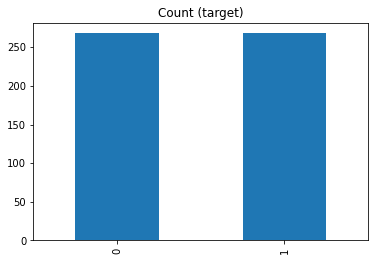

In [39]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Outcome'].value_counts())

test_under['Outcome'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

# 2. Random Over-Sampling
### Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

### A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

class count of 1 and 0:
 1    500
0    500
Name: Outcome, dtype: int64


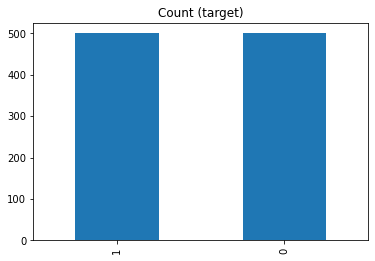

In [40]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Outcome'].value_counts())

# plot the count
test_under['Outcome'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

# 8. Change the performance metric
#### Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.




In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.6808080808080808
Accuracy score: 0.6883116883116883
F1 score: 0.6000000000000001


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
xscaled=x.apply(zscore)
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=49)
NNH=KNeighborsClassifier(n_neighbors=7)
NNH.fit(x_train, y_train)
predict_y = m.predict(x_test)
print('ROCAUC score:',roc_auc_score(y_test, predict_y))
print('Accuracy score:',accuracy_score(y_test, predict_y))
print('F1 score:',f1_score(y_test, predict_y))

ROCAUC score: 0.5
Accuracy score: 0.6060606060606061
F1 score: 0.0


In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=5,max_features=4,min_samples_split=6)
RF=RandomForestClassifier()
RF.fit(x_train, y_train)
predict_y = RF.predict(x_test)
print('ROCAUC score:',roc_auc_score(y_test, predict_y))
print('Accuracy score:',accuracy_score(y_test, predict_y))
print('F1 score:',f1_score(y_test, predict_y))

ROCAUC score: 0.6832417582417581
Accuracy score: 0.7186147186147186
F1 score: 0.5911949685534591


In [52]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.701098901098901
Accuracy score: 0.70995670995671
F1 score: 0.6417112299465241
